# Clustering in Python

We work with a wine dataset. Each column has information about the composition of a particular chemical. There is a column called "quality" that, based on all the aspects that the wine professional knows, gives a rating to it. So, the price of the wine depends on the sommelier's assessment and its composition. Therefore, through clustering, a similar price can be set for the wines that belong to the same cluster.

### Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape # 1599 wines

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

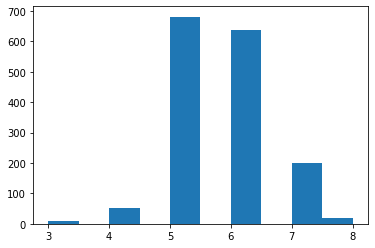

In [6]:
plt.hist(df["quality"])

We see that most of the samples are assigned a quality of 5 or 6. There are very bad wines (3 quality) and a few more there are good ones (7 or 8 quality).

If we want to look at the average of the various chemical compounds across the different qualities, we do the following:

In [7]:
df.groupby(df["quality"]).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


The volatile acidity seems to negatively influence the quality of the wine: the higher its value, the worse the wine's rating. The same thing happens with chlorides, the higher it is, the worse it is rated.

Sulfates have a positive influence (higher sulfates, better evaluation). This also happens for citric acid.

On the other hand, the density of the wine is almost the same for all, and it seems that fixed acidity, residual sugar and ph behave in the same way

Total and free sulfur dioxide varies greatly and does not seem to have much relationship.

### Data normalization


In [8]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Hierarchical clustering with scikit-learn

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clusters = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(df_norm)

In [23]:
md_h = pd.Series(clusters.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Number of wines in the cluster')

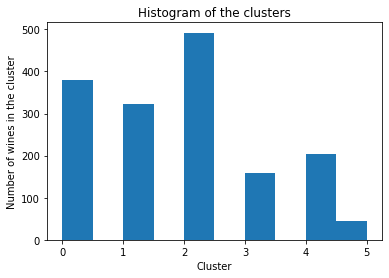

In [24]:
plt.hist(md_h)
plt.title("Histogram of the clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of wines in the cluster")

With this implementation it seems that there are many more bad wines than those that were actually considered that way by the sommelier. The observations are much more uniform than they were in the personal opinion of said sommerlier.

In [15]:
clusters.children_ # structure of each of the children

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage(df_norm, "ward")

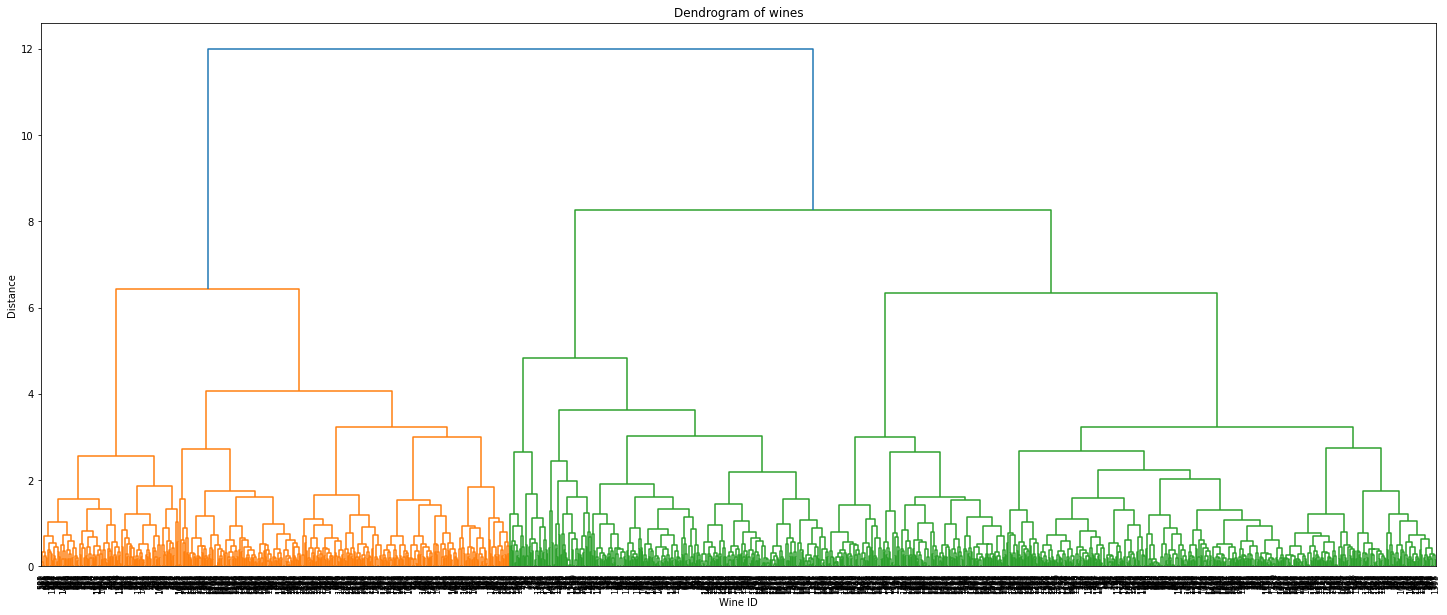

In [19]:
plt.figure(figsize = (25,10))
plt.title("Dendrogram of wines")
plt.xlabel("Wine ID")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.0)
plt.show()

By cutting a little above 4, we could obtain the 6 clusters we want.

## K-means

In [20]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [21]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [22]:
model.labels_

array([3, 3, 3, ..., 2, 2, 1])

In [25]:
md_k = pd.Series(model.labels_)

In [26]:
df_norm["cluster_h"] = md_h 
df_norm["cluster_k"] = md_k 

In [27]:
df_norm.head() # We see that although the cluster number changes, between the different methods, the same numbers correspond

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


(array([247.,   0., 264.,   0., 232.,   0., 507.,   0., 321.,  28.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

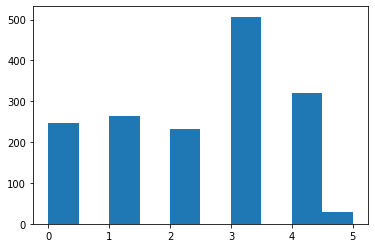

In [28]:
plt.hist(md_k)

We see that the result is more or less similar. The number does not correspond to that of md_h, but we do see that there is a dominant group, another that is too small and the rest have approximately the same heights.

The model is also capable of giving us the centroids:

In [29]:
model.cluster_centers_ # (6,12)

array([[0.57844577, 0.20521602, 0.50376518, 0.13132938, 0.12994667,
        0.13480071, 0.09101443, 0.65710702, 0.33274889, 0.22475696,
        0.28344233, 0.54493927],
       [0.37144677, 0.15928549, 0.43060606, 0.10720216, 0.1068068 ,
        0.16533291, 0.08425688, 0.41513149, 0.41687545, 0.23741154,
        0.49050117, 0.69772727],
       [0.17634269, 0.32253779, 0.09202586, 0.09403047, 0.09643227,
        0.24581107, 0.12262398, 0.32483923, 0.57633044, 0.18462214,
        0.48742263, 0.61034483],
       [0.26412526, 0.35930534, 0.12370809, 0.09147956, 0.12283457,
        0.14380365, 0.10738704, 0.49208149, 0.48598363, 0.15529887,
        0.22023466, 0.43984221],
       [0.3153861 , 0.27663978, 0.30302181, 0.15104767, 0.12661289,
        0.38135668, 0.2969739 , 0.5380442 , 0.43633331, 0.18074132,
        0.21464973, 0.45607477],
       [0.33375474, 0.28962818, 0.49428571, 0.07363014, 0.56671834,
        0.20372233, 0.20368501, 0.51384519, 0.23762655, 0.58639863,
        0.16098901,

In [30]:
model.inertia_

186.60298145798927

## Final interpretation

Clustering can now be used to place a price on each of the wine samples from the same cluster, so that everyone belonging to the same cluster should have a more or less similar price and do a marketing campaign for customers who They prefer a certain ingredient in wine for example, or to differentiate one brand from another but all of them with the same category.

To do this, we can calculate the average composition of each cluster for each component:

In [31]:
df_norm.groupby("cluster_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.578446,0.205216,0.503765,0.131329,0.129947,0.134801,0.091014,0.657107,0.332749,0.224757,0.283442,0.544939,2.064777
1,0.371447,0.159285,0.430606,0.107202,0.106807,0.165333,0.084257,0.415131,0.416875,0.237412,0.490501,0.697727,0.102273
2,0.176343,0.322538,0.092026,0.094030,0.096432,0.245811,0.122624,0.324839,0.576330,0.184622,0.487423,0.610345,3.375000
3,0.264125,0.359305,0.123708,0.091480,0.122835,0.143804,0.107387,0.492081,0.485984,0.155299,0.220235,0.439842,2.005917
4,0.315386,0.276640,0.303022,0.151048,0.126613,0.381357,0.296974,0.538044,0.436333,0.180741,0.214650,0.456075,1.065421
5,0.333755,0.289628,0.494286,0.073630,0.566718,0.203722,0.203685,0.513845,0.237627,0.586399,0.160989,0.471429,4.892857


So this data set is organized by the clusters that we have formed and not by the decisions of a certain person (not feelings).

Based on what was found, the quality of the wine and flavor depends on:
The fixed acidity seems to be one above the rest (0.578446), we can see that the highest value of citric acid also corresponds to the highest of fixed acidity. We see that alcohol also influences as well as the sugar level.

Something we could say about this:

Let's imagine that people from a certain region in northern Europe (cold regions) tend to prefer wine with greater volatile acidity, therefore, those belonging to cluster 2 and 3 would be appropriate for this requirement.

For people who like wines with a higher alcohol level, cluster 1 and 2 would be ideal for this type of people.

People who want to buy a wine based on the sommerlier's opinion would have to choose between cluster 1 and 2, which have the highest quality.